## EDA on US Accidents Data

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('SanJose_Accidents.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13122 entries, 0 to 13121
Data columns (total 49 columns):
ID                       13122 non-null object
Source                   13122 non-null object
TMC                      9596 non-null float64
Severity                 13122 non-null int64
Start_Time               13122 non-null object
End_Time                 13122 non-null object
Start_Lat                13122 non-null float64
Start_Lng                13122 non-null float64
End_Lat                  3526 non-null float64
End_Lng                  3526 non-null float64
Distance(mi)             13122 non-null float64
Description              13122 non-null object
Number                   860 non-null float64
Street                   13122 non-null object
Side                     13122 non-null object
City                     13122 non-null object
County                   13122 non-null object
State                    13122 non-null object
Zipcode                  13122 non-null obje

In [3]:
data.columns

Index(['ID', 'Source', 'TMC', 'Severity', 'Start_Time', 'End_Time',
       'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)',
       'Description', 'Number', 'Street', 'Side', 'City', 'County', 'State',
       'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp',
       'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)',
       'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)',
       'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing',
       'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station',
       'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop',
       'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

Out of 49 columns, let's eliminate the ones that are irrelevant.

In [5]:
features = ['Start_Time', 'Start_Lat', 'Start_Lng', 'Zipcode', 'Temperature(F)', 'Humidity(%)',\
            'Visibility(mi)', 'Wind_Speed(mph)', 'Weather_Condition']
selected_data = data[features]
selected_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13122 entries, 0 to 13121
Data columns (total 9 columns):
Start_Time           13122 non-null object
Start_Lat            13122 non-null float64
Start_Lng            13122 non-null float64
Zipcode              13122 non-null object
Temperature(F)       13055 non-null float64
Humidity(%)          13036 non-null float64
Visibility(mi)       13076 non-null float64
Wind_Speed(mph)      10205 non-null float64
Weather_Condition    13056 non-null object
dtypes: float64(6), object(3)
memory usage: 922.8+ KB


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002C8D7FACDD8>,
      dtype=object)

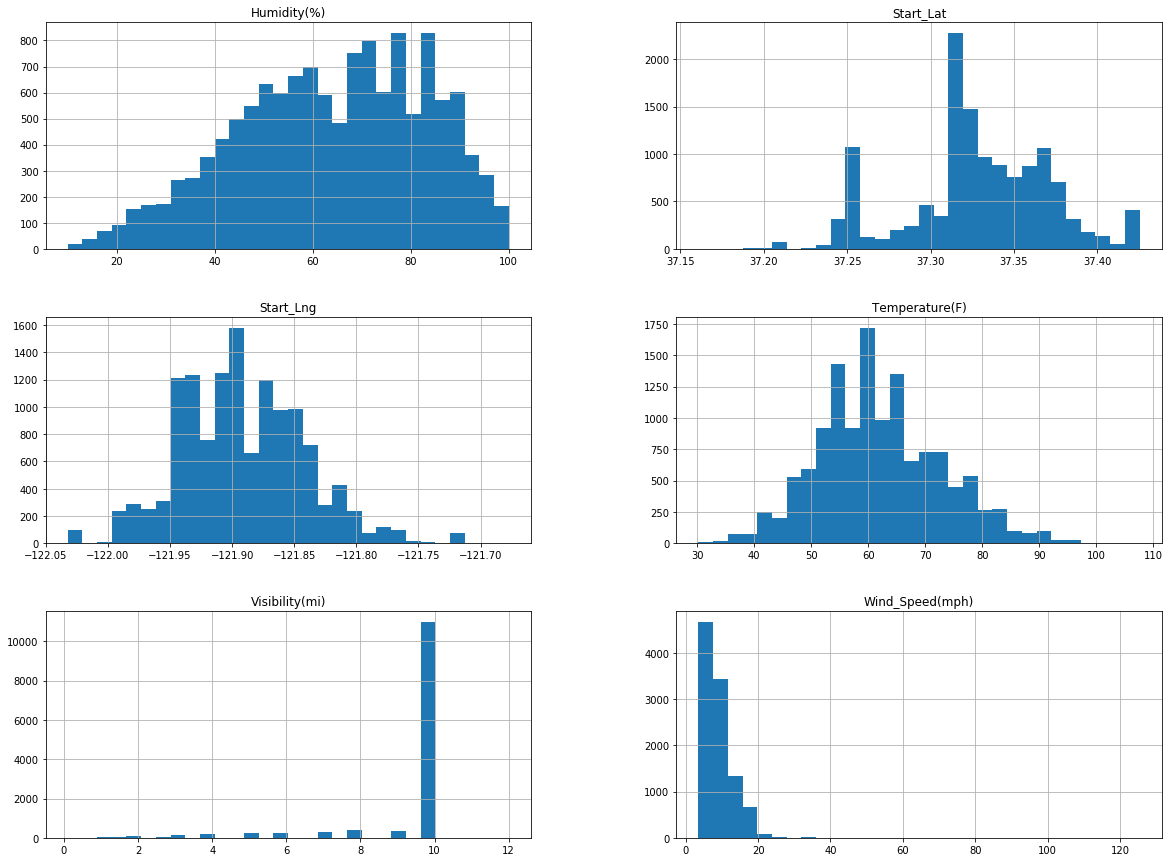

In [6]:
selected_data.hist(bins=30,figsize=(20,15))

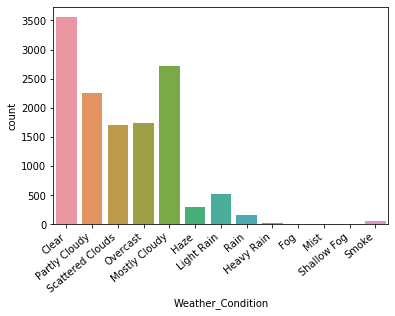

In [7]:
import seaborn as sns

wplot = sns.countplot(data=selected_data,x='Weather_Condition')
wplot.set_xticklabels(wplot.get_xticklabels(), rotation=40, ha="right")
plt.show()

In [8]:
# Date Parsing
import datetime

# day_dict = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
selected_data['Year'] = selected_data.apply(lambda row: int(row.Start_Time.split(' ')[0].split('-')[0]), axis = 1)
selected_data['Month'] = selected_data.apply(lambda row: int(row.Start_Time.split(' ')[0].split('-')[1]), axis = 1)
selected_data['Day'] = selected_data.apply(lambda row: int(row.Start_Time.split(' ')[0].split('-')[2]), axis = 1)
selected_data['Hour'] = selected_data.apply(lambda row: int(row.Start_Time.split(' ')[1].split(':')[0]), axis = 1)
selected_data['Weekday'] = selected_data.apply(lambda row: datetime.date(row.Year, row.Month, row.Day).weekday(), axis = 1)
selected_data['Day_of_Year'] = selected_data.apply(lambda row: datetime.date(row.Year, row.Month, row.Day).timetuple().tm_yday, axis=1)

c:\users\swlee\anaconda3\envs\cmpe255\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
c:\users\swlee\anaconda3\envs\cmpe255\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
c:\users\swlee\anaconda3\envs\cmpe255\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the do

In [9]:
selected_data.head()

,Start_Time,Start_Lat,Start_Lng,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,Year,Month,Day,Hour,Weekday,Day_of_Year
0,2016-06-21 10:16:26,37.250729,-121.910713,95118,75.2,41.0,10.0,5.8,Clear,2016,6,21,10,1,173
1,2016-06-21 10:17:17,37.328312,-121.871811,95112,73.0,53.0,10.0,4.6,Partly Cloudy,2016,6,21,10,1,173
2,2016-06-21 11:30:58,37.382370,-121.904358,95131-2310,84.0,27.0,10.0,8.1,Partly Cloudy,2016,6,21,11,1,173
3,2016-06-21 12:53:58,37.401531,-121.908859,95131,87.1,24.0,10.0,9.2,Partly Cloudy,2016,6,21,12,1,173
4,2016-06-21 13:15:59,37.316650,-121.945389,95128,87.1,24.0,10.0,9.2,Partly Cloudy,2016,6,21,13,1,173


In [10]:
# zipcode extra digits removal
selected_data['Zipcode'] = selected_data.apply(lambda row: row.Zipcode.split('-')[0], axis=1)

# temperature null checking
print("# of NaN in Temperature")
print(selected_data['Temperature(F)'].isna().sum())

# fill the temperature with the month's average
temp_monthly_avg = selected_data.groupby(['Month']).mean()['Temperature(F)']
selected_data['Temperature(F)'] = selected_data.apply(lambda row: \
                                                      temp_monthly_avg.iloc[row.Month-1] \
                                                      if np.isnan(row['Temperature(F)']) \
                                                      else row['Temperature(F)'], axis=1)

print(selected_data['Temperature(F)'].isna().sum())

# humidity null checking
print("# of NaN in Humidity")
print(selected_data['Humidity(%)'].isna().sum())

# fill the temperature with the month's average
temp_monthly_avg = selected_data.groupby(['Month']).mean()['Humidity(%)']
selected_data['Humidity(%)'] = selected_data.apply(lambda row: \
                                                      temp_monthly_avg.iloc[row.Month-1] \
                                                      if np.isnan(row['Humidity(%)']) \
                                                      else row['Humidity(%)'], axis=1)

print(selected_data['Humidity(%)'].isna().sum())

# visibility null checking
print("# of NaN in Visibility")
print(selected_data['Visibility(mi)'].isna().sum())

# fill the temperature with the month's average
selected_data['Visibility(mi)'] = selected_data.apply(lambda row: \
                                                      selected_data['Visibility(mi)'].mean() \
                                                      if np.isnan(row['Visibility(mi)']) \
                                                      else row['Visibility(mi)'], axis=1)

print(selected_data['Visibility(mi)'].isna().sum())

# visibility null checking
print("# of NaN in Wind Speed")
print(selected_data['Wind_Speed(mph)'].isna().sum())

# fill the temperature with the month's average
selected_data['Wind_Speed(mph)'] = selected_data.apply(lambda row: \
                                                      round(selected_data['Wind_Speed(mph)'].mean(),1) \
                                                      if np.isnan(row['Wind_Speed(mph)']) \
                                                      else row['Wind_Speed(mph)'], axis=1)

print(selected_data['Wind_Speed(mph)'].isna().sum())

# weather condition null checking
print("# of NaN in Weather Condition")
print(selected_data['Weather_Condition'].isna().sum())

selected_data = selected_data.dropna(subset=['Weather_Condition'])

print(selected_data['Weather_Condition'].isna().sum())

c:\users\swlee\anaconda3\envs\cmpe255\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


# of NaN in Temperature
67


c:\users\swlee\anaconda3\envs\cmpe255\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
c:\users\swlee\anaconda3\envs\cmpe255\lib\site-packages\ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0
# of NaN in Humidity
86
0
# of NaN in Visibility
46


c:\users\swlee\anaconda3\envs\cmpe255\lib\site-packages\ipykernel_launcher.py:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


0
# of NaN in Wind Speed
2917
0
# of NaN in Weather Condition
66
0


c:\users\swlee\anaconda3\envs\cmpe255\lib\site-packages\ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [11]:
selected_data.isna().sum()

Start_Time           0
Start_Lat            0
Start_Lng            0
Zipcode              0
Temperature(F)       0
Humidity(%)          0
Visibility(mi)       0
Wind_Speed(mph)      0
Weather_Condition    0
Year                 0
Month                0
Day                  0
Hour                 0
Weekday              0
Day_of_Year          0
dtype: int64

In [12]:
selected_data.shape

(13056, 15)

### DBSCAN

In [13]:
def latitude_to_meters(lat):
    return lat*69.2*1.6*1000

def longitude_to_meters(lng):
    return lng*55.051*1.6*1000

In [14]:
lat_height = latitude_to_meters(data['Start_Lat'].max() - data['Start_Lat'].min())
lng_width = longitude_to_meters(data['Start_Lng'].max() - data['Start_Lng'].min())

print(round(lat_height,2), round(lng_width,2), "meters")

29262.63 31273.28 meters


In [15]:
location = ['Start_Lat', 'Start_Lng']
loc_data = selected_data[location]

In [16]:
latitude_to_meters(0.001)

110.72

In [17]:
from sklearn.cluster import DBSCAN
import numpy as np

# 0.001 degree in latitude means ~100 meters
# cluster requires at least 20 accidents
db = DBSCAN(eps=0.001, min_samples=20).fit(loc_data)

labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
print('Estimated number of clusters: %d' % n_clusters_)
n_noise_ = list(labels).count(-1)
print('Estimated number of noise points: %d' % n_noise_)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True

Estimated number of clusters: 138
Estimated number of noise points: 1601


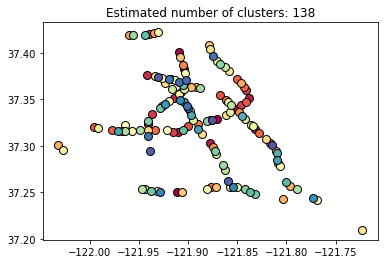

In [18]:
cluster_loc = []
cluster_mean = {}

unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k != -1:
        class_member_mask = (labels == k)

        xy = loc_data[class_member_mask & core_samples_mask]
        plt.plot(xy.iloc[:, 1].mean(), xy.iloc[:, 0].mean(), 'o', markerfacecolor=tuple(col),
                 markeredgecolor='k', markersize=8)
        cluster_loc.append((xy.iloc[:, 1].mean(), xy.iloc[:, 0].mean(), xy.shape[0]))
        cluster_mean[k] = [xy.iloc[:, 1].mean(), xy.iloc[:, 0].mean()]

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

In [19]:
cluster_mean

{0: [-121.911475459854, 37.2506074890511],
 1: [-121.87014448523209, 37.328977004219404],
 2: [-121.90437576000001, 37.382331980000004],
 3: [-121.90885139622644, 37.40142467924528],
 4: [-121.85237216037737, 37.33945519811321],
 5: [-121.91004734710745, 37.314934809917354],
 6: [-121.83809152127662, 37.352010723404256],
 7: [-121.87805580597015, 37.30331252985076],
 8: [-121.8315585315315, 37.31836245045045],
 9: [-121.9144701764706, 37.35154916176471],
 10: [-121.87809929166666, 37.327629625],
 11: [-121.9415089264706, 37.376785375000004],
 12: [-121.94074160606058, 37.323178868686874],
 13: [-121.93629862053571, 37.33448062946429],
 14: [-121.84629894074072, 37.343490170370366],
 15: [-121.91487706666665, 37.31527619999999],
 16: [-121.84139818823529, 37.36010215294117],
 17: [-121.94008294915255, 37.42027866101696],
 18: [-121.90168114087759, 37.364702545034646],
 19: [-121.91776645833333, 37.37199116666667],
 20: [-121.8997591227545, 37.32106230838323],
 21: [-121.86703359064329, 

In [20]:
selected_data['Cluster'] = db.labels_.tolist()

In [21]:
# drop the noise cluster
selected_data.drop(selected_data[selected_data['Cluster'] == -1].index , inplace=True)

In [22]:
cluster_data = pd.DataFrame(cluster_loc, columns = ['Start_Lng' , 'Start_Lat', 'Num'])

In [31]:
import json
import requests

api_key_loc = './../apikey.txt'

f = open(api_key_loc, "r")
key = f.readline()
f.close()

lat = 37.335624
lng = -121.885134

lat_d = 37.309331
lng_d = -121.886047

url = 'https://maps.googleapis.com/maps/api/distancematrix/json?units=metrics&origins=' + \
        str(lat) + ',' + str(lng) + \
        '&destinations=' +\
        str(lat_d) + ',' + str(lng_d) + \
        '&key=' + key

response = requests.get(url)
data = response.json()

In [32]:
data

{'destination_addresses': ['525 W Alma Ave, San Jose, CA 95125, USA'],
 'origin_addresses': ['150 E San Fernando St, San Jose, CA 95112, USA'],
 'rows': [{'elements': [{'distance': {'text': '4.0 km', 'value': 4017},
     'duration': {'text': '5 mins', 'value': 318},
     'status': 'OK'}]}],
 'status': 'OK'}

In [23]:
import gmaps
import gmaps.datasets

# api_key uniquely belongs to Sean
api_key_loc = './../apikey.txt'

f = open(api_key_loc, "r")
key = f.readline()
f.close()

gmaps.configure(api_key=key) # Your Google API key
# load a Numpy array of (latitude, longitude) pairs
s_data = selected_data[selected_data['Hour'] == 23]
locations = s_data[['Start_Lat','Start_Lng']] #gmaps.datasets.load_dataset("taxi_rides")

center_lat = 37.330092
center_lng = -121.871385

fig = gmaps.figure(map_type='SATELLITE', center=(center_lat, center_lng), zoom_level=11)
#fig = gmaps.figure()
fig.add_layer(gmaps.heatmap_layer(locations))
fig

Figure(layout=FigureLayout(height='420px'))

In [128]:
clustered_loc = cluster_data

fig = gmaps.figure()
heatmap_layer = gmaps.heatmap_layer(
    clustered_loc[['Start_Lat', 'Start_Lng']], weights=clustered_loc['Num'],
    max_intensity=100, point_radius=7.0
)
fig.add_layer(heatmap_layer)
fig

Figure(layout=FigureLayout(height='420px'))

In [60]:
clustered_loc

,Start_Lng,Start_Lat,Num
0,-121.911475,37.250607,137
1,-121.870144,37.328977,237
2,-121.904376,37.382332,50
3,-121.908851,37.401425,53
4,-121.852372,37.339455,318
...,...,...,...
133,-121.858940,37.262721,20
134,-121.938527,37.294895,25
135,-121.930717,37.374337,30
136,-121.814369,37.301270,2


In [45]:
selected_data

,Start_Time,Start_Lat,Start_Lng,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,Year,Month,Day,Hour,Weekday,Day_of_Year,Cluster
0,2016-06-21 10:16:26,37.250729,-121.910713,95118,75.2,41.0,10.0,5.8,Clear,2016,6,21,10,1,173,0
1,2016-06-21 10:17:17,37.328312,-121.871811,95112,73.0,53.0,10.0,4.6,Partly Cloudy,2016,6,21,10,1,173,1
2,2016-06-21 11:30:58,37.382370,-121.904358,95131,84.0,27.0,10.0,8.1,Partly Cloudy,2016,6,21,11,1,173,2
3,2016-06-21 12:53:58,37.401531,-121.908859,95131,87.1,24.0,10.0,9.2,Partly Cloudy,2016,6,21,12,1,173,3
5,2016-06-21 14:34:20,37.339455,-121.852043,95122,93.2,16.0,10.0,15.0,Clear,2016,6,21,14,1,173,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13117,2017-08-29 08:39:10,37.208383,-121.721098,95138,64.4,83.0,4.0,8.9,Overcast,2017,8,29,8,1,241,58
13118,2017-08-30 06:18:10,37.375060,-121.932999,95110,60.1,86.0,10.0,8.1,Overcast,2017,8,30,6,2,242,60
13119,2017-08-30 14:16:40,37.343100,-121.901410,95110,78.1,50.0,10.0,10.4,Clear,2017,8,30,14,2,242,130
13120,2017-08-30 16:25:40,37.317310,-121.935970,95128,79.0,45.0,10.0,10.4,Partly Cloudy,2017,8,30,16,2,242,28


In [46]:
cluster_mean[0]

[-121.911475459854, 37.2506074890511]

In [47]:
# store cluster_lat, cluster_lng from cluster_mean
selected_data['Cluster_Lat'] = selected_data.apply(lambda row:\
                                                   cluster_mean[row.Cluster][1], axis=1)
selected_data['Cluster_Lng'] = selected_data.apply(lambda row:\
                                                   cluster_mean[row.Cluster][0], axis=1)

In [48]:
selected_data

,Start_Time,Start_Lat,Start_Lng,Zipcode,Temperature(F),Humidity(%),Visibility(mi),Wind_Speed(mph),Weather_Condition,Year,Month,Day,Hour,Weekday,Day_of_Year,Cluster,Cluster_Lat,Cluster_Lng
0,2016-06-21 10:16:26,37.250729,-121.910713,95118,75.2,41.0,10.0,5.8,Clear,2016,6,21,10,1,173,0,37.250607,-121.911475
1,2016-06-21 10:17:17,37.328312,-121.871811,95112,73.0,53.0,10.0,4.6,Partly Cloudy,2016,6,21,10,1,173,1,37.328977,-121.870144
2,2016-06-21 11:30:58,37.382370,-121.904358,95131,84.0,27.0,10.0,8.1,Partly Cloudy,2016,6,21,11,1,173,2,37.382332,-121.904376
3,2016-06-21 12:53:58,37.401531,-121.908859,95131,87.1,24.0,10.0,9.2,Partly Cloudy,2016,6,21,12,1,173,3,37.401425,-121.908851
5,2016-06-21 14:34:20,37.339455,-121.852043,95122,93.2,16.0,10.0,15.0,Clear,2016,6,21,14,1,173,4,37.339455,-121.852372
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13117,2017-08-29 08:39:10,37.208383,-121.721098,95138,64.4,83.0,4.0,8.9,Overcast,2017,8,29,8,1,241,58,37.209597,-121.722701
13118,2017-08-30 06:18:10,37.375060,-121.932999,95110,60.1,86.0,10.0,8.1,Overcast,2017,8,30,6,2,242,60,37.375016,-121.933072
13119,2017-08-30 14:16:40,37.343100,-121.901410,95110,78.1,50.0,10.0,10.4,Clear,2017,8,30,14,2,242,130,37.342893,-121.901296
13120,2017-08-30 16:25:40,37.317310,-121.935970,95128,79.0,45.0,10.0,10.4,Partly Cloudy,2017,8,30,16,2,242,28,37.317154,-121.933523


In [49]:
selected_data.to_csv ('PositiveTrainingData.csv', index = None, header=True) #Don't forget to add '.csv' at the end of the path